In [35]:
!c:\Users\haiaj\AppData\Local\Programs\Python\Python311\python.exe -m pip install scikit-learn

     --------------------------------------- 11.1/11.1 MB 65.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
print(sys.executable)

c:\Users\haiaj\AppData\Local\Programs\Python\Python311\python.exe


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [22]:
preprocessed_sleep_data = pd.read_csv('ema.csv')
preprocessed_sleep_data.head()

,ID,sex,age,BMI,insomnia,insomnia.group,ActivityDate,covid19,weekday,weekday.sleep,...,WASO.SSD,SO.num.SSD,WakeUp.num.SSD,PsyDist.cm,PsyDist.mc,stress.VE,stress_total,worry.VE,worry_total,mood.VE
0,s001,F,19.332247,20.595703,0,control,2019-01-07,pre-COVID19,weekday,weekday,...,NaN,NaN,NaN,1.45122,0.882114,0.0,2,0.0,1,0.0
1,s001,F,19.332247,20.595703,0,control,2019-01-08,pre-COVID19,weekday,weekday,...,132.25,0.010000,0.134444,1.45122,0.215447,0.0,0,0.0,1,0.0
2,s001,F,19.332247,20.595703,0,control,2019-01-09,pre-COVID19,weekday,weekday,...,272.25,0.613611,0.001111,1.45122,1.215447,0.0,1,0.0,1,0.0
3,s001,F,19.332247,20.595703,0,control,2019-01-10,pre-COVID19,weekday,weekday,...,NaN,NaN,NaN,1.45122,0.215447,0.0,1,0.0,2,0.0
4,s001,F,19.332247,20.595703,0,control,2019-01-11,pre-COVID19,weekday,weekend,...,NaN,NaN,NaN,1.45122,NaN,NaN,0,NaN,0,NaN


In [23]:
print(preprocessed_sleep_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6219 non-null   object 
 1   sex             6219 non-null   object 
 2   age             6219 non-null   float64
 3   BMI             6219 non-null   float64
 4   insomnia        6219 non-null   int64  
 5   insomnia.group  6219 non-null   object 
 6   ActivityDate    6219 non-null   object 
 7   covid19         6219 non-null   object 
 8   weekday         6219 non-null   object 
 9   weekday.sleep   6219 non-null   object 
 10  dayNr           6219 non-null   int64  
 11  partdayNr       6219 non-null   int64  
 12  StartTime       5121 non-null   object 
 13  EndTime         5121 non-null   object 
 14  SleepDataType   4754 non-null   object 
 15  EBEDataType     5121 non-null   object 
 16  TIB             5121 non-null   float64
 17  TST             5121 non-null   f

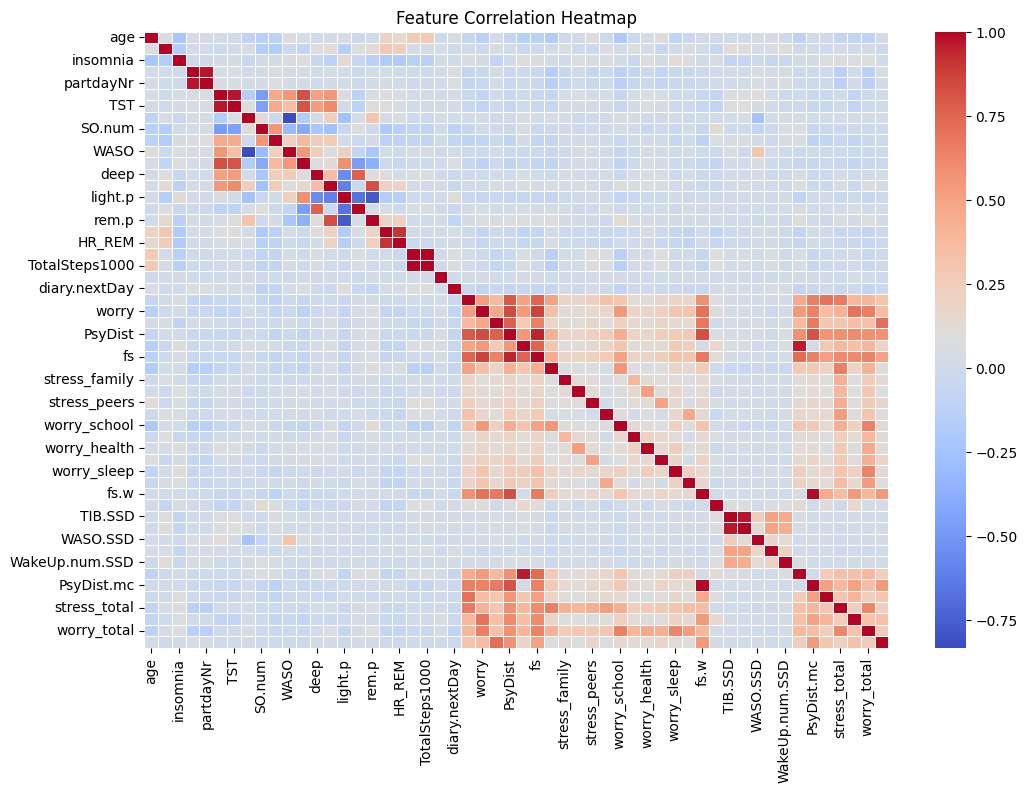

In [ ]:
#correlation matrix
correlation_matrix = preprocessed_sleep_data.corr(numeric_only=True)

#visualize correlation with heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#identify pairs with high correlation (> 0.85)
high_corr_pairs = set()
threshold = 0.85

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

print("Highly Correlated Feature Pairs:")
print(high_corr_pairs)

Highly Correlated Feature Pairs:
{('TotalSteps1000', 'TotalSteps'), ('PsyDist.mc', 'fs.w'), ('HR_REM', 'HR_NREM'), ('TST', 'TIB'), ('TST.SSD', 'TIB.SSD'), ('fs', 'PsyDist'), ('PsyDist.cm', 'fs.b'), ('fs', 'worry'), ('partdayNr', 'dayNr')}


In [ ]:
#columns to drop based on correlation analysis
columns_to_drop = [
    'HR_REM',  # Keeping HR_NREM
    'PsyDist.cm',  # Keeping fs.b
    'PsyDist.mc',  # Keeping fs.w
    'TIB',  # Keeping TST
    'TIB.SSD',  # Keeping TST.SSD
    'TotalSteps1000',  # Keeping TotalSteps
    'fs',  # Keeping PsyDist
    'worry',  # Keeping PsyDist
    'partdayNr'  # Keeping dayNr
]

preprocessed_sleep_data.drop(columns=columns_to_drop, inplace=True)

#check
print("Updated dataset shape:", preprocessed_sleep_data.shape)
print("Remaining columns:", preprocessed_sleep_data.columns)

Updated dataset shape: (6219, 60)
Remaining columns: Index(['ID', 'sex', 'age', 'BMI', 'insomnia', 'insomnia.group', 'ActivityDate',
       'covid19', 'weekday', 'weekday.sleep', 'dayNr', 'StartTime', 'EndTime',
       'SleepDataType', 'EBEDataType', 'TST', 'SE', 'SO', 'WakeUp', 'SO.num',
       'WakeUp.num', 'WASO', 'light', 'deep', 'rem', 'light.p', 'deep.p',
       'rem.p', 'HR_NREM', 'TotalSteps', 'StartedTime', 'SubmittedTime',
       'surveyDuration', 'diary.nextDay', 'stress', 'mood', 'PsyDist', 'fs.b',
       'stress_school', 'stress_family', 'stress_health', 'stress_peers',
       'stress_other', 'worry_school', 'worry_family', 'worry_health',
       'worry_peer', 'worry_sleep', 'worry_other', 'fs.w', 'majMiss',
       'TST.SSD', 'WASO.SSD', 'SO.num.SSD', 'WakeUp.num.SSD', 'stress.VE',
       'stress_total', 'worry.VE', 'worry_total', 'mood.VE'],
      dtype='object')


In [ ]:
#check missing values
missing_percent = (preprocessed_sleep_data.isnull().sum() / len(preprocessed_sleep_data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

HR_NREM           30.535456
deep.p            29.232996
rem.p             29.232996
light             29.232996
deep              29.232996
rem               29.232996
light.p           29.232996
TotalSteps        25.004020
WakeUp.num.SSD    24.650265
SO.num.SSD        24.650265
WASO.SSD          24.650265
TST.SSD           24.650265
SleepDataType     23.556842
stress            20.694645
mood              20.694645
PsyDist           20.694645
surveyDuration    20.694645
fs.w              20.694645
stress.VE         20.694645
worry.VE          20.694645
diary.nextDay     20.694645
mood.VE           20.694645
SubmittedTime     20.694645
StartedTime       20.694645
EndTime           17.655572
WASO              17.655572
WakeUp.num        17.655572
SO.num            17.655572
WakeUp            17.655572
SO                17.655572
SE                17.655572
TST               17.655572
EBEDataType       17.655572
StartTime         17.655572
dtype: float64


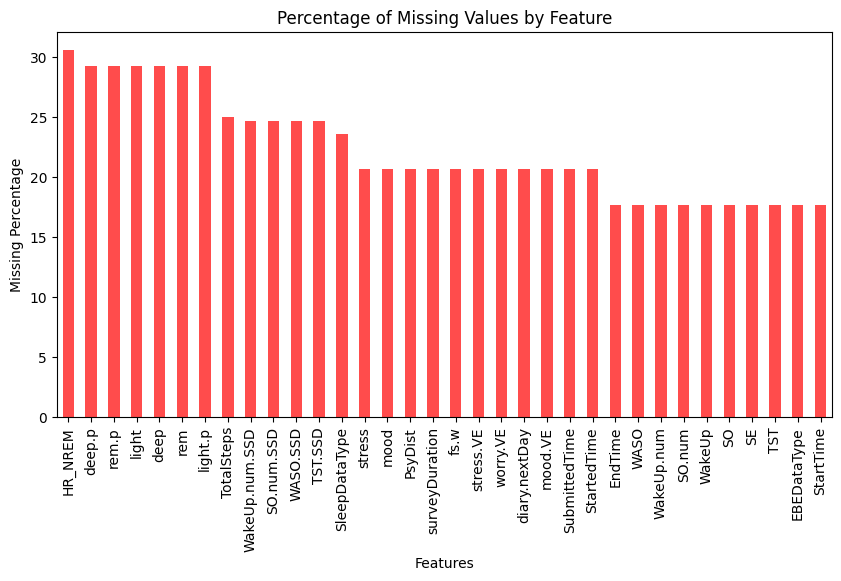

In [ ]:
#plot missing values as a bar chart
plt.figure(figsize=(10,5))
missing_percent.plot(kind='bar', color='red', alpha=0.7)
plt.title("Percentage of Missing Values by Feature")
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#convert timestamps into datetime format
preprocessed_sleep_data['StartTime'] = pd.to_datetime(preprocessed_sleep_data['StartTime'], errors='coerce')
preprocessed_sleep_data['EndTime'] = pd.to_datetime(preprocessed_sleep_data['EndTime'], errors='coerce')

#get hour based features
preprocessed_sleep_data['StartHour'] = preprocessed_sleep_data['StartTime'].dt.hour
preprocessed_sleep_data['EndHour'] = preprocessed_sleep_data['EndTime'].dt.hour

#drop original datetime columns
preprocessed_sleep_data.drop(columns=['StartTime', 'EndTime'], inplace=True)

In [ ]:
#select only numerical columns
numerical_cols = preprocessed_sleep_data.select_dtypes(include=['number']).columns

#impute missing numerical values with median
preprocessed_sleep_data[numerical_cols] = preprocessed_sleep_data[numerical_cols].fillna(preprocessed_sleep_data[numerical_cols].median())


In [ ]:
#select categorical columns
categorical_cols = preprocessed_sleep_data.select_dtypes(include=['object']).columns

#impute missing categorical values using dictionary
preprocessed_sleep_data.fillna({col: preprocessed_sleep_data[col].mode()[0] for col in categorical_cols}, inplace=True)


In [ ]:
#check, hopefully 0
print("Remaining missing values after imputation:", preprocessed_sleep_data.isnull().sum().sum())

Remaining missing values after imputation: 0


In [ ]:
# One-Hot Encoding for multi-category variables
preprocessed_sleep_data = pd.get_dummies(preprocessed_sleep_data, columns=['insomnia.group', 'covid19'], drop_first=True)

# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
preprocessed_sleep_data['sex'] = label_encoder.fit_transform(preprocessed_sleep_data['sex'])

# Confirm encoding
print(preprocessed_sleep_data.head())

     ID  sex        age        BMI  insomnia ActivityDate  weekday  \
0  s001    0  19.332247  20.595703         0   2019-01-07  weekday   
1  s001    0  19.332247  20.595703         0   2019-01-08  weekday   
2  s001    0  19.332247  20.595703         0   2019-01-09  weekday   
3  s001    0  19.332247  20.595703         0   2019-01-10  weekday   
4  s001    0  19.332247  20.595703         0   2019-01-11  weekday   

  weekday.sleep  dayNr SleepDataType  ... stress.VE  stress_total  worry.VE  \
0       weekday      1        stages  ...       0.0             2       0.0   
1       weekday      2        stages  ...       0.0             0       0.0   
2       weekday      3        stages  ...       0.0             1       0.0   
3       weekday      4        stages  ...       0.0             1       0.0   
4       weekend      5        stages  ...       0.0             0       0.0   

  worry_total mood.VE  StartHour  EndHour  insomnia.group_control  \
0           1     0.0       22.0   

In [ ]:
# Define numerical columns to scale
numerical_cols = ['TST', 'SE', 'WASO', 'light', 'deep', 'rem', 'StartHour', 'EndHour']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
preprocessed_sleep_data[numerical_cols] = scaler.fit_transform(preprocessed_sleep_data[numerical_cols])

# Confirm normalization
print(preprocessed_sleep_data[numerical_cols].describe())


               TST           SE         WASO        light         deep  \
count  6219.000000  6219.000000  6219.000000  6219.000000  6219.000000   
mean      0.332260     0.763196     0.162316     0.390164     0.469558   
std       0.103943     0.076192     0.073901     0.108354     0.128868   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.279037     0.727658     0.120543     0.340832     0.408669   
50%       0.334278     0.765547     0.156197     0.388076     0.467492   
75%       0.389164     0.798715     0.191851     0.435321     0.526316   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               rem    StartHour      EndHour  
count  6219.000000  6219.000000  6219.000000  
mean      0.374272     0.374239     0.308432  
std       0.113670     0.438985     0.069158  
min       0.000000     0.000000     0.000000  
25%       0.319829     0.043478     0.272727  
50%       0.371002     0.086957     0.318182  
75% 